# Predicting Yards Gained on Run Plays in the NFL

## GSA Workshop 1: Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Getting To Know the Data

First, let's import some libraries we will need.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, let's load the training data, ensuring proper data type inference.

In [3]:
# Load the dataset
data = pd.read_csv('drive/MyDrive/train.csv', low_memory=False)

Here are a few easy ways to gain a better understanding of our data.

The pandas `head` function allows you to see a preview of your data, displaying the first five rows of your data.

In [4]:
# Display the first few rows (default = 5)
data.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


The pandas `nunique` function allows you to see every column in your data, along with the number of unique values found in each column. For example, for the `HomeTeamAbbr` column, there are 32 possible home teams, and hence unique values, which you see below in the output.

In [5]:
# Get number of unique values in each column (can be useful for locating naming inconsistencies and other faults in the data)
data.nunique()

,0
GameId,688
PlayId,31007
Team,2
X,10938
Y,4370
S,890
A,922
Dis,105
Orientation,36001
Dir,36001



The pandas `info` function provides information abouut each column, importantly the data type (ie integer).

In [6]:
# Get info about column types/counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

### Data Cleaning

Now that we've analyzed these outputs, let's look at some different ways we can clean our data (note: this cleaning is for exemplary purposes and is not comprehensive).

In the table above, we see that some columns contain less values than others. Let's examine these missing values more thoroughly.

In [7]:
# Display missing values
print("\nMissing Values:")
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


Missing Values:
WindDirection        104676
WindSpeed             91872
Temperature           63646
GameWeather           60170
StadiumType           41690
FieldPosition          8602
Humidity               6160
OffenseFormation         88
Dir                      28
Orientation              23
DefendersInTheBox        22
dtype: int64


What are some of the ways we could address the problem these missing values create?

To start, many of the columns have thousands, or even hundreds of thousands, of missing values, and most likely won't be particularly important when predicting yards gained.

Let's simply remove these columns from our dataset! We can do so using the pandas `drop` function, and passing into the function the names of the columns we want to drop.

In [8]:
# Drop (remove) columns with lots of missing values and minimal relevance
data = data.drop(columns=['WindDirection', 'WindSpeed', 'Temperature', 'GameWeather', 'StadiumType', 'Humidity', 'FieldPosition'])

In [9]:
# Display missing values
print("\nMissing Values:")
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


Missing Values:
OffenseFormation     88
Dir                  28
Orientation          23
DefendersInTheBox    22
dtype: int64


Now we are left with a few columns with very few missing values, considering the size of our dataset.

Since these columns are nearly full and might even help us predict yards gained, let's simply drop the rows with missing values.

This will not significantly impact our dataset. We can use the `dropna` function to do so, which will remove any row with missing values from our data.

In [10]:
# Drop (remove) ROWS with minimal missing values in more relevant columns
data = data.dropna()

# Display missing values (updated)
print("\nMissing Values:")
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


While we're at it, let's simplify the dataset even further by removing any other columns we don't plan on using to predict yards gained.

This is a subjective process, but for the purposes of the workshop, these are the columns we will be removing. Feel free to play around with this yourself!

In [11]:
# Drop (remove) other less relevant columns
data = data.drop(columns=['DisplayName', 'JerseyNumber',
       'Season', 'GameClock', 'PossessionTeam', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'NflIdRusher', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'PlayerBirthDate', 'PlayerCollegeName',
       'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'Stadium',
       'Location', 'Turf'])

In [12]:
data.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Quarter,Down,Distance,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,Yards,PlayerHeight,PlayerWeight
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,3,2,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",8,6-0,212
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,3,2,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",8,6-3,288
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,3,2,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",8,6-3,270
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,3,2,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",8,6-3,245
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,3,2,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",8,6-0,206


Now that we've filtered down the dataset, let's consider how we can transform the values in our dataset. Why might we want to do this?

A straightforward example: the Team column.

In [13]:
data['Team'].unique()

array(['away', 'home'], dtype=object)

How can we convert "away" and "home" into "better" values (think numerical)?

In [14]:
# Convert Team column to binary values
data["IsHomeTeam"] = data['Team'] == "home"
data = data.drop(columns=['Team'])

data["IsHomeTeam"].unique()

array([False,  True])

Another example: the PlayerHeight column.

In [15]:
data['PlayerHeight'].head()

,PlayerHeight
0,6-0
1,6-3
2,6-3
3,6-3
4,6-0


In their current form, these height values will be difficult to work with since they are strings. Let's convert them into integers.

In [16]:
# Convert height values to inches
def convert_to_inches(height):
    feet, inches = map(int, height.split('-'))
    ##FILL IN
    return feet * 12 + inches


data['PlayerHeight'] = data['PlayerHeight'].apply(convert_to_inches)
data['PlayerHeight'].head()

,PlayerHeight
0,72
1,75
2,75
3,75
4,72


Question: how might we encode other categorical variables with lots of values, such as OffenseFormation or OffensePersonnel?

Enough cleaning for now. Let's do some visualization!

In [17]:
import numpy as np
def compute_stats(column_name):
    column = data[column_name].to_numpy()

    min_val = np.min(column)
    max_val = np.max(column)
    average = np.mean(column)
    median = np.median(column)
    stddev = np.std(column)

    print("min:", min_val)
    print("max:", max_val)
    print("average:", average)
    print("median:", median)
    print("standard deviation:", stddev)


TARGET = 'Yards' ####FILL IN
compute_stats(TARGET)

min: -15
max: 99
average: 4.227724717536076
median: 3.0
standard deviation: 6.450239727935432


### Data Visualization

Let's start by visualizing our target variable, `Yards` (i.e. Univariate Analysis). Specifically, let's look at the distribution of `Yards` gained across all of our data.

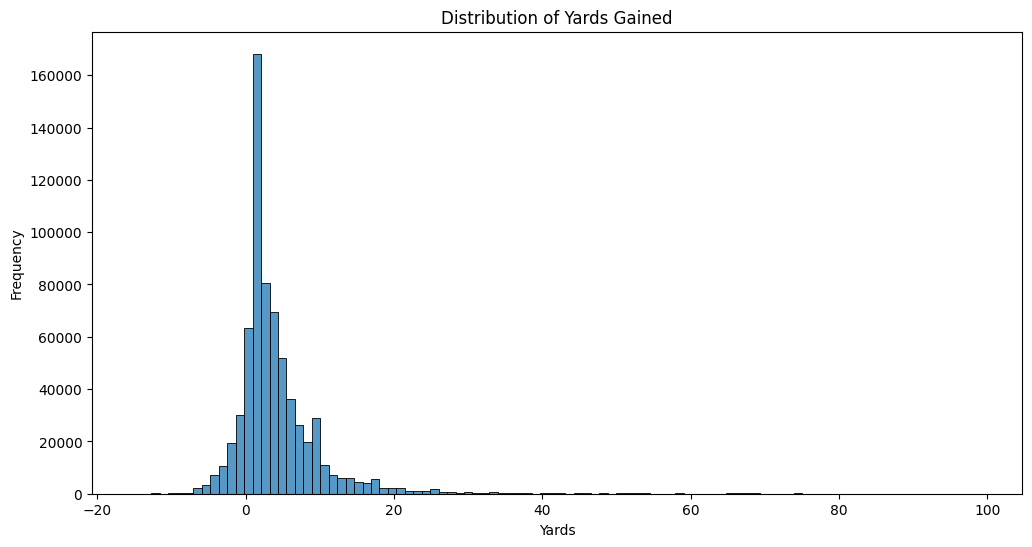

In [18]:
# Visualization of target variable (Yards)
plt.figure(figsize=(12, 6))

#FILL IN THIS:
BINS = 100 ###FILL IN
sns.histplot(data[TARGET], bins=BINS)
# sns.histplot(data['Yards'], bins=30)
plt.title('Distribution of Yards Gained')
plt.xlabel('Yards')
plt.ylabel('Frequency')
plt.show()

Let's now visualize the relationship between our target (yards gained) and other key columns to gain a better understanding of how these features influence the target (i.e. Bivariate Analysis)

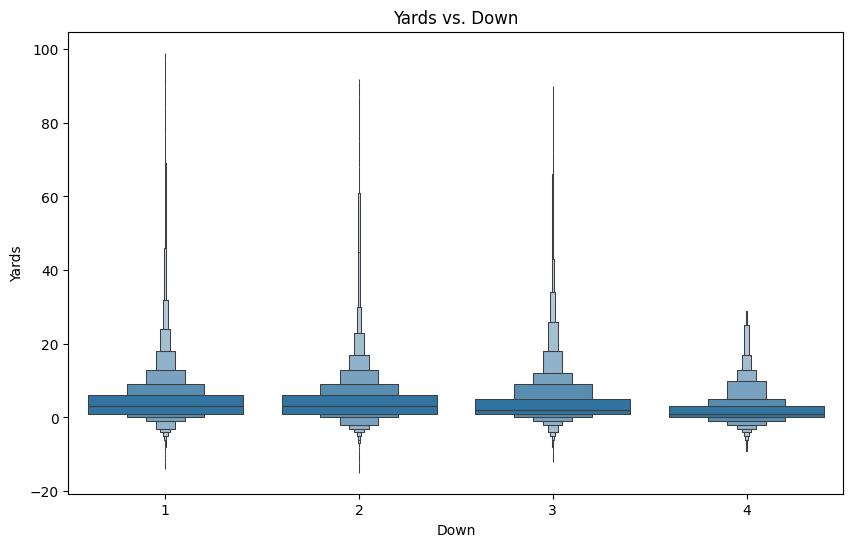

In [19]:
# Visualize yards gained depending on the down
plt.figure(figsize=(10, 6))

x_var = 'Down' #FILL IN, CAN EXPERIMENT
sns.boxenplot(x=x_var, y=TARGET, data=data)
# sns.boxenplot(x='Down', y='Yards', data=data)
plt.title(f'Yards vs. {x_var}')
plt.show()

In [20]:
def visualize_top_n(x_label, n, target):
    # Get top n (most common) values from column;
    # ... create filtered dataframe that only contains plays with values from the top_n list
    top_n = data.groupby(x_label)['PlayId'].count().sort_values(ascending=False).index[:n].tolist()
    data_play = data.groupby('PlayId').first()
    data_topn = data_play.loc[data_play[x_label].isin(top_n)]

    _, ax = plt.subplots(figsize=(15, 5))
    sns.violinplot(x=x_label, y=target, data=data_topn, ax=ax)
    plt.ylim(-10, 20)
    plt.title(f'{x_label} vs {target}')
    plt.show()
    stats = data_topn.groupby(x_label)[target].describe()

    return stats

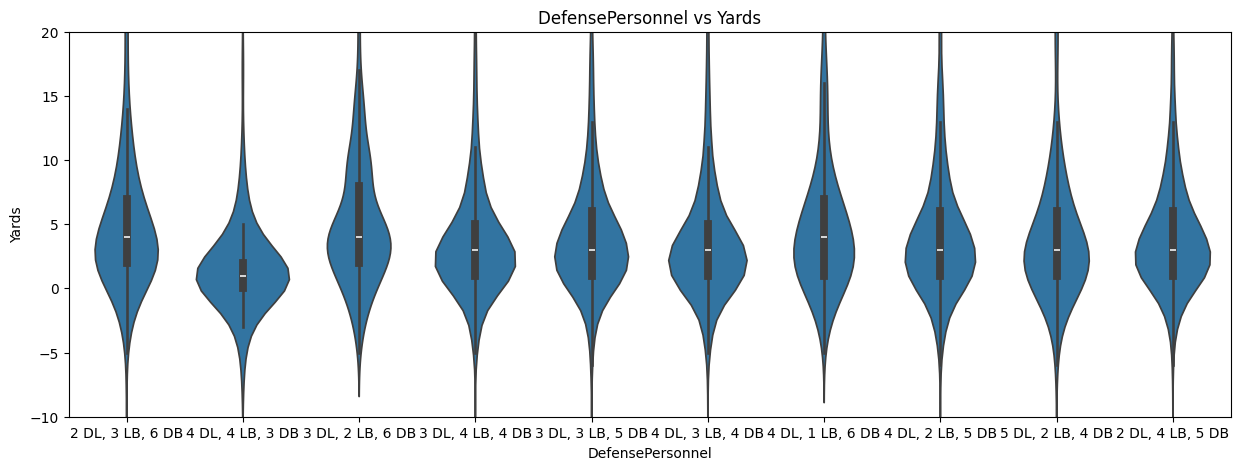

,count,mean,std,min,25%,50%,75%,max
DefensePersonnel,,,,,,,,
"2 DL, 3 LB, 6 DB",788.0,5.149746,6.720441,-8.0,2.0,4.0,7.0,65.0
"2 DL, 4 LB, 5 DB",3699.0,4.357124,5.849409,-14.0,1.0,3.0,6.0,81.0
"3 DL, 2 LB, 6 DB",239.0,5.117155,5.121515,-5.0,2.0,4.0,8.0,25.0
"3 DL, 3 LB, 5 DB",3406.0,4.468291,6.348843,-15.0,1.0,3.0,6.0,84.0
"3 DL, 4 LB, 4 DB",5018.0,4.000399,6.539008,-12.0,1.0,3.0,5.0,97.0
"4 DL, 1 LB, 6 DB",475.0,5.197895,6.688582,-5.0,1.0,4.0,7.0,57.0
"4 DL, 2 LB, 5 DB",8053.0,4.513970,6.792939,-12.0,1.0,3.0,6.0,91.0
"4 DL, 3 LB, 4 DB",7873.0,3.970659,6.375211,-12.0,1.0,3.0,5.0,99.0
"4 DL, 4 LB, 3 DB",295.0,1.925424,5.719747,-8.0,0.0,1.0,2.0,72.0


In [21]:
# Visualize yards gained depending on the defensive setup
# made this a function
visualize_top_n('DefensePersonnel', 10, TARGET) ##FILL IN PARAMETERS HERE....

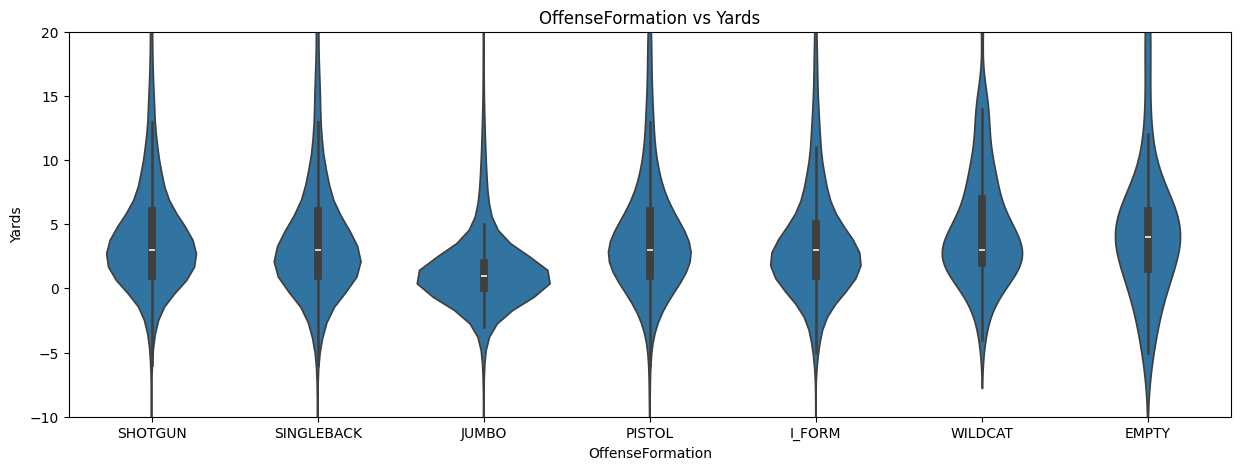

,count,mean,std,min,25%,50%,75%,max
OffenseFormation,,,,,,,,
EMPTY,31.0,4.419355,5.340251,-5.0,1.5,4.0,6.0,21.0
I_FORM,6225.0,4.090120,6.704688,-12.0,1.0,3.0,5.0,83.0
JUMBO,677.0,1.812408,5.625541,-7.0,0.0,1.0,2.0,90.0
PISTOL,979.0,4.625128,6.393809,-9.0,1.0,3.0,6.0,63.0
SHOTGUN,9389.0,4.468740,6.002628,-12.0,1.0,3.0,6.0,87.0
SINGLEBACK,13624.0,4.213153,6.654788,-15.0,1.0,3.0,6.0,99.0
WILDCAT,77.0,4.675325,4.482250,-4.0,2.0,3.0,7.0,21.0


In [22]:
# # Visualize yards gained depending on the defensive setup
#Made this a function
visualize_top_n('OffenseFormation', 7, TARGET) ##FILL IN PARAMETERS HERE....

Now, let's create a correlation matrix to gain a more comprehensive understanding of our variables and how they impact each other.

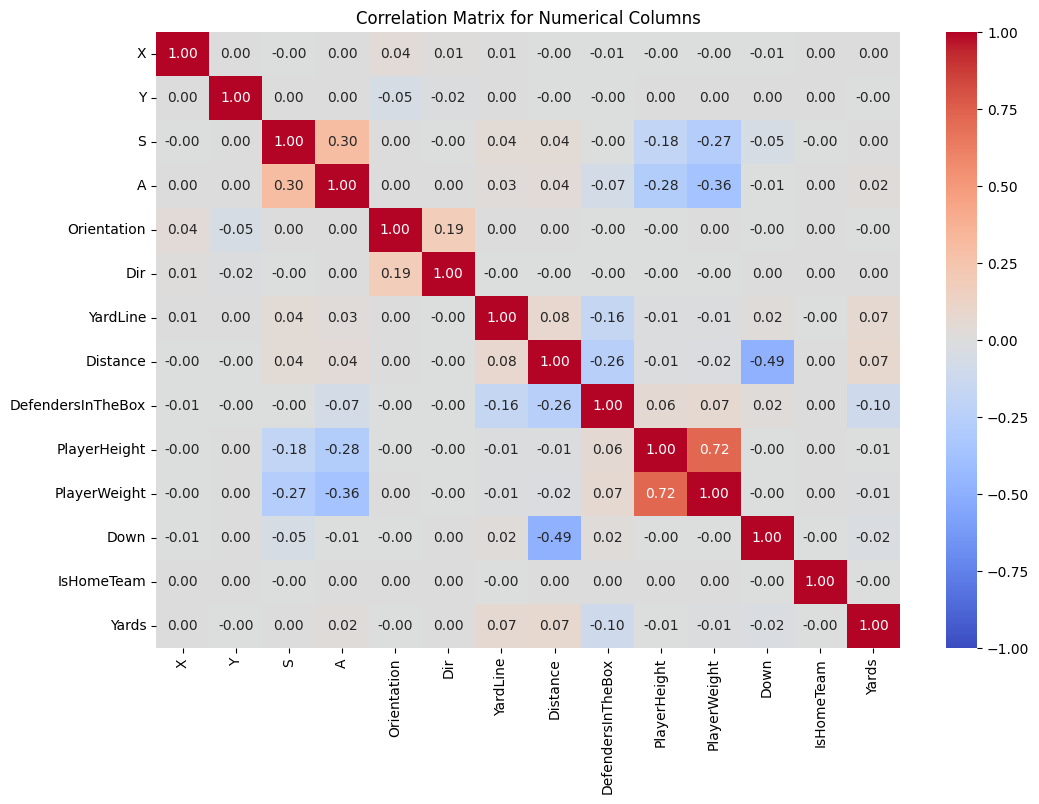

In [23]:
# Specify numerical Columns
numerical_columns = [
    'X', 'Y', 'S', 'A', 'Orientation', 'Dir', 'YardLine', 'Distance',
    'DefendersInTheBox', 'PlayerHeight', 'PlayerWeight', 'Down', 'IsHomeTeam'
]

# Create correlation matrix
corr_matrix = data[numerical_columns + ['Yards']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

Let's discuss some key observations from the matrix above:
* Correlation between Yards and other features is frequently near 0
    * Exceptions:
        * Correlation between Yards and YardLine
        * Correlation between Yards and Distance (distance from first down)
        * Negative correlation between Yards and DefendersInTheBox

Let's inspect these correlations more closely:

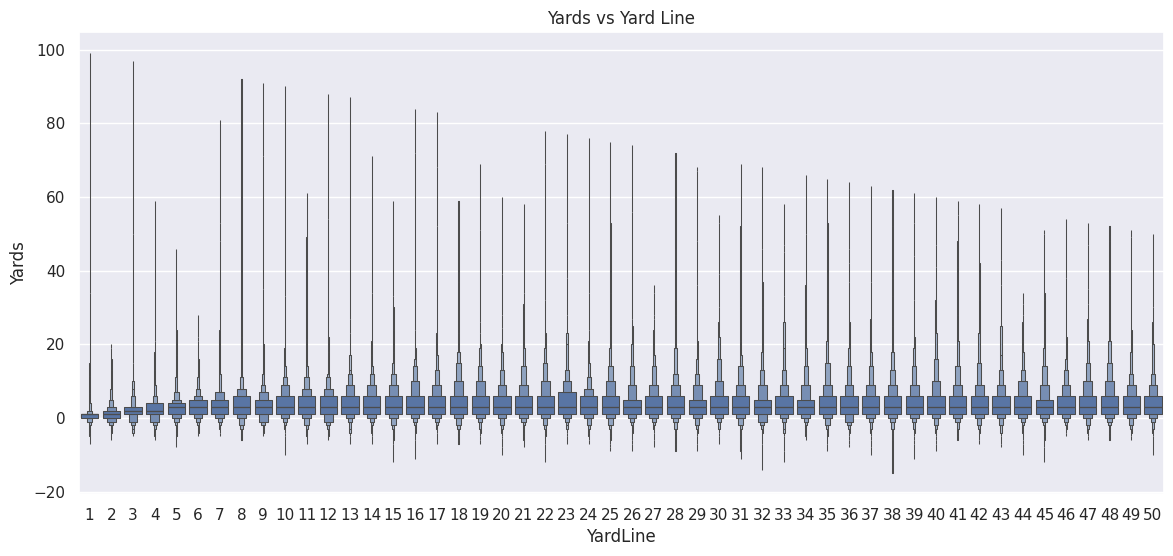

In [24]:
# Visualize yards gained depending on the yard line
plt.figure(figsize=(14, 6))
sns.set(font_scale=1)
sns.boxenplot(x='YardLine', y='Yards', data=data)
plt.title('Yards vs Yard Line')
plt.show()

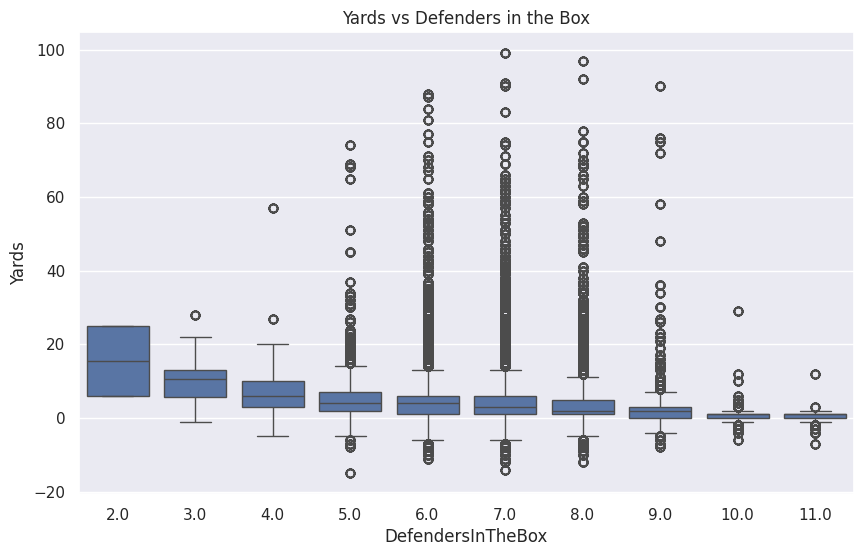

In [25]:
# Visualize yards gained depending on the number of defenders in the box
plt.figure(figsize=(10, 6))
sns.boxplot(x='DefendersInTheBox', y='Yards', data=data)
plt.title('Yards vs Defenders in the Box')
plt.show()